<a href="https://colab.research.google.com/github/caioodlucass/Boeing-737-900ER-Research/blob/main/Connected__FMS_official_aerodynamics_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.scimath import *

In [ ]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [ ]:
def R( k, cp):
    
    R=0.0
    R=((((k)-1.0)/(k))*(cp))
    return R

def a_zero( R, T_zero, k):
    
    a_zero=0.0
    a_zero=(pow(((k)*(R*1000.0)*(T_zero)),(1.0/2.0)))
    return a_zero

def t_r( k, mach):
    
    t_r=0.0
    t_r=float(1.0+((((k)-1.0)/2.0)*(pow((mach),2.0))))
    return t_r

def t_lamb( T_four, T_zero):

    t_lamb=0.0
    t_lamb=((T_four)/(T_zero))
    return t_lamb

def t_c( CPR, k):

    t_c=0.0
    t_c=(pow((CPR),(((k)-1.0)/(k))))
    return t_c

def t_f( FPR, k):

    t_f=0.0
    t_f=(pow((FPR),(((k)-1.0)/(k))))
    return t_f

def v_nine( k, t_lamb, t_r, t_c, bp, t_f):

    v_nine=0.0
    v_nine=(pow(((2.0/((k)-1.0))*((t_lamb)- ((t_r)*(((t_c)-1.0)+((bp)*((t_f)-1.0))))-((t_lamb)/((t_r)*(t_c))))),(1.0/2.0)))
    return v_nine

def v_nineteen( k, t_r, t_f):

    v_nineteen=0.0
    v_nineteen=(pow(((2.0/((k)-1.0))*(((t_r)*(t_f))-1.0)),(1.0/2.0)))
    return v_nineteen

# def v_nineteen_mod( v_fan, a_zero):

#     v_nineteen_mod=0.0
#     v_nineteen_mod=(v_fan/a_zero)
#     return v_nineteen_mod

def F_mzero( a_zero, bp, v_nine, mach, v_nineteen):

    F_mzero=0.0
    F_mzero=(((a_zero)/(1.0+(bp)))*((v_nine)-(mach)+((bp)*((v_nineteen)-(mach)))))
    return F_mzero

def f( cp, T_zero, hpr, t_lamb, t_r, t_c):

    f=0.0
    f=((((cp)*(T_zero))/(hpr))*((t_lamb)-((t_r)*(t_c))))
    return f

def S( f, bp, F_mzero):

    S=0.0
    S=(((f)/((1.0+(bp))*(F_mzero)))*(pow(10.0,6.0)))
    return S

def n_t( t_r, t_c):

    n_t=0.0
    n_t=(100.0*(1.0-(1.0/((t_r)*(t_c)))))
    return n_t

def n_p( mach, v_nine, bp, v_nineteen):

    n_p=0.0
    n_p=(100.0*((2.0*(mach))*(((v_nine)-(mach)+((bp)*((v_nineteen)-(mach))))/((pow((v_nine),2.0))-(pow((mach),2.0))+((bp)*((pow((v_nineteen),2.0))-(pow((mach),2.0))))))))
    return n_p

def n_o( n_t, n_p):

    n_o=0.0
    n_t = n_t/100.0
    n_p = n_p/100.0
    n_o=((n_t)*(n_p))
    n_o = n_o*100.0
    return n_o

def FR ( v_nine, mach,  v_nineteen):

    FR=0.0
    FR=((v_nine-mach)/((v_nineteen)-(mach)))
    return FR

def total_zero( k, T_zero,  mach):

    total_zero=0.0
    total_zero=((T_zero)*(1.0+((((k)-1.0)/2.0)*(pow((mach),2.0)))))
    return total_zero

def w_net( cp, T_four, CPR, T_three,k):

    w_net=0.0 
    w_net=(((cp)*(T_four-T_three))*(1-(1/(pow((CPR),(((k)-1.0)/(k)))))))
    return w_net
    

def n_cycle(CPR,k):

    n_cycle =0.0
    n_cycle=(1-(1/(pow((CPR),(((k)-1.0)/(k))))))
    return n_cycle
   

def w_reverse(CPR,k):

    w_reverse=0.0
    w_reverse=(1/(pow((CPR),(((k)-1.0)/(k)))))
    return w_reverse
    
  
def F (v_fan, mach):
  
  mzero = 182.71535
  bypass = 5.1
  mach = 0.79
  vcruise = (mach*340.0)
  Fcruise = 86740.3
  vnine = ((((Fcruise)*(1+(bypass)))/(mzero))+(vcruise)-((bypass)*(1067.831788))+((bypass)*(vcruise)))
  F = ((((mzero)/(1+(bypass)))*((vnine)-(vcruise)))+((((mzero)*(bypass))/(1+(bypass)))*((v_fan)-(vcruise))))
  return F

def TSFC( F, f):
  
  TSFC=0.0
  mzero = 182.71535
  TSFC=(((f)*(mzero))/((F)*(0.7)))
  return TSFC

def RF (TSFC):
        
  q = ((0.7)*(17740.0)*(pow((0.79),(2.0))))
  vcruise = 268.8291
  Cl = ((751612.77)/((q)*(124.6)))
  Cd = (((0.056)*(pow((Cl),(2.0))))-((0.008)*(Cl))+(0.015))
  RF = ((((Cl)/(Cd))*((vcruise)/(TSFC))*((1.0)/(9.81)))/1000.0)
  return RF


In [ ]:
computation = np.zeros( (1, 9) , dtype=np.float)
sevenb_naca_m_output = np.zeros( (1, 11) , dtype=np.float)
sevenb_naca_m_parameter = np.zeros( (1, 11) , dtype=np.float)
bypass = np.zeros( (1, 6) , dtype=np.float)
tsfc = np.zeros( (6, 7) , dtype=np.float)
specific_thrust= np.zeros( (6, 7) , dtype=np.float)
thermal_ef = np.zeros( (6, 7) , dtype=np.float)
propulsive_ef = np.zeros( (6, 7) , dtype=np.float)
overall_ef = np.zeros( (6, 7) , dtype=np.float)
thrust_ratio = np.zeros( (6, 7) , dtype=np.float)
cycle_ef = np.zeros( (7, 7) , dtype=np.float)
net_work= np.zeros( (7, 7) , dtype=np.float)
reverse_work= np.zeros( (7, 7) , dtype=np.float)
matrix_M = [0.,0.5,1.,1.5,2.,2.5,3.]
matrix_CPR = list(range(0,38,6))

sevenb_naca_m_parameter[0][2]=1.4
sevenb_naca_m_parameter[0][3]=1.005
sevenb_naca_m_parameter[0][4]=42800.0
sevenb_naca_m_parameter[0][5]=1973.15
sevenb_naca_m_output[0][10]=723.15

In [ ]:
#print('\n                                ENDURANCE: Engine Security Control (I-TF version)\n\n\n\n\n')
print(' CFM56-7B (NACA 6409 - modified nacelle) \n')
print(' **This station numbering is in accordance with ARP 755A - SAE Gas Turbine Engine Notation\n\n\n')
print('  | M(0)                          - Mach number                        |  ',sevenb_naca_m_parameter[0][0])
print('  | T(0)                      [K] - Ambient temperature                |  ',sevenb_naca_m_parameter[0][1])
print('  | k                             - Adiabatic expansion coefficient    |  ',sevenb_naca_m_parameter[0][2])
print('  | Cp                  [kJ/kg*K] - Specific heat at constant pressure |  ',sevenb_naca_m_parameter[0][3])
print('  | hPR                   [kJ/kg] - Fuel heating value                 |  ',sevenb_naca_m_parameter[0][4])
print('  | T(t4)                     [K] - Station 4 total temperature        |  ',sevenb_naca_m_parameter[0][5])
print('  | CPR                           - Compressor pressure ratio          |  ',sevenb_naca_m_parameter[0][6])
print('  | FPR                           - Fan pressure ratio                 |  ',sevenb_naca_m_parameter[0][7])
print('  | BP                            - Bypass ratio                       |  ',sevenb_naca_m_parameter[0][8])
print('  | T(t3)                     [K] - Station 3 total temperature        |  ',sevenb_naca_m_output[0][10])
print('  | V(19)                   [m/s] - Station 19 speed                   |  ',sevenb_naca_m_parameter[0][9])

print('\n Enter flight conditions data: \n\n')

A = sevenb_naca_m_parameter[0][1] = float(input(' T(0)   [K] : '))
B = sevenb_naca_m_parameter[0][6] = float(input(' CPR        : '))
C = sevenb_naca_m_parameter[0][7] = float(input(' FPR        : '))
D = sevenb_naca_m_parameter[0][9] = float(input(' V(19)   [m/s] : '))

# print('\n Enter values of bypass for the performance analysis curves: \n\n')

bypass[0][0] = 0.5 #float(input(' First curve: ')) 
bypass[0][1] = 1.0 #float(input(' Second curve: '))
bypass[0][2] = 2.0 #float(input(' Third curve: '))
bypass[0][3] = 5.0 #float(input(' Fourth curve:: '))
bypass[0][4] = 8.0 #float(input(' Fifth curve:: '))
bypass[0][5] = 10.0 #float(input(' Sixth curve:: '))




 CFM56-7B (NACA 6409 - modified nacelle) 

 **This station numbering is in accordance with ARP 755A - SAE Gas Turbine Engine Notation



  | M(0)                          - Mach number                        |   0.0
  | T(0)                      [K] - Ambient temperature                |   0.0
  | k                             - Adiabatic expansion coefficient    |   1.4
  | Cp                  [kJ/kg*K] - Specific heat at constant pressure |   1.005
  | hPR                   [kJ/kg] - Fuel heating value                 |   42800.0
  | T(t4)                     [K] - Station 4 total temperature        |   1973.15
  | CPR                           - Compressor pressure ratio          |   0.0
  | FPR                           - Fan pressure ratio                 |   0.0
  | BP                            - Bypass ratio                       |   0.0
  | T(t3)                     [K] - Station 3 total temperature        |   723.15
  | V(19)                   [m/s] - Station 19 speed        

In [ ]:
sevenb_naca_m_parameter[0][8]= bypass[0][0]
if sevenb_naca_m_parameter[0][8]==bypass[0][0]:
    sevenb_naca_m_parameter[0][0]=0.0
    if sevenb_naca_m_parameter[0][0]==0.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[0][0] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        specific_thrust[0][0] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[0][0] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[0][0] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[0][0] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[0][0] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==0.5:

        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[0][1] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        specific_thrust[0][1] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[0][1] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[0][1] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[0][1] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[0][1] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
      
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[0][2] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        specific_thrust[0][2] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[0][2] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[0][2] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[0][2] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[0][2] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[0][3] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[0][3] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[0][3] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[0][3] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[0][3] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[0][3] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[0][4] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[0][4] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[0][4] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[0][4] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[0][4] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[0][4] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[0][5] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))  
        specific_thrust[0][5] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[0][5] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[0][5] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[0][5] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[0][5] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==3.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[0][6] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[0][6] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[0][6] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[0][6] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[0][6] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[0][6] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        
sevenb_naca_m_parameter[0][8]=bypass[0][1]
if sevenb_naca_m_parameter[0][8]==bypass[0][1]:
    sevenb_naca_m_parameter[0][0]=0.0
    if sevenb_naca_m_parameter[0][0]==0.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[1][0] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        specific_thrust[1][0] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[1][0] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[1][0] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[1][0] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[1][0] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==0.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[1][1] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        specific_thrust[1][1] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[1][1] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[1][1] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[1][1] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[1][1] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[1][2] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[1][2] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[1][2] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[1][2] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[1][2] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[1][2] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[1][3] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[1][3] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[1][3] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[1][3] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[1][3] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[1][3] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[1][4] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))  
        specific_thrust[1][4] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[1][4] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[1][4] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[1][4] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[1][4] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[1][5] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[1][5] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[1][5] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[1][5] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[1][5] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[1][5] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==3.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[1][6] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[1][6] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[1][6] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[1][6] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[1][6] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[1][6] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
    
sevenb_naca_m_parameter[0][8]=bypass[0][2]
if sevenb_naca_m_parameter[0][8]==bypass[0][2]:
    sevenb_naca_m_parameter[0][0]=0.0
    if sevenb_naca_m_parameter[0][0]==0.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[2][0] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))  
        specific_thrust[2][0] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[2][0] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[2][0] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[2][0] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[2][0] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==0.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[2][1] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))  
        specific_thrust[2][1] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[2][1] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[2][1] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[2][1] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[2][1] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.0:
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[2][2] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        specific_thrust[2][2] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[2][2] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[2][2] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[2][2] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[2][2] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[2][3] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        specific_thrust[2][3] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[2][3] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[2][3] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[2][3] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[2][3] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[2][4] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))   
        specific_thrust[2][4] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[2][4] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[2][4] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[2][4] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[2][4] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[2][5] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))    
        specific_thrust[2][5] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[2][5] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[2][5] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[2][5] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[2][5] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==3.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[2][6] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))   
        specific_thrust[2][6] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[2][6] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[2][6] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[2][6] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[2][6] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        
sevenb_naca_m_parameter[0][8]=bypass[0][3]
if sevenb_naca_m_parameter[0][8]==bypass[0][3]:
    sevenb_naca_m_parameter[0][0]=0.0
    if sevenb_naca_m_parameter[0][0]==0.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[3][0] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[3][0] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[3][0] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[3][0] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[3][0] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[3][0] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==0.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[3][1] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[3][1] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[3][1] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[3][1] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[3][1] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[3][1] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[3][2] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[3][2] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[3][2] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[3][2] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[3][2] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[3][2] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[3][3] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[3][3] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[3][3] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[3][3] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[3][3] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[3][3] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[3][4] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[3][4] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[3][4] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[3][4] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[3][4] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[3][4] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[3][5] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[3][5] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[3][5] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[3][5] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[3][5] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[3][5] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==3.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[3][6] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[3][6] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[3][6] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[3][6] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[3][6] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[3][6] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        
sevenb_naca_m_parameter[0][8]=bypass[0][4]
if sevenb_naca_m_parameter[0][8]==bypass[0][4]:
    sevenb_naca_m_parameter[0][0]=0.0
    if sevenb_naca_m_parameter[0][0]==0.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[4][0] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[4][0] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[4][0] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[4][0] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[4][0] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[4][0] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==0.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[4][1] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        specific_thrust[4][1] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[4][1] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[4][1] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[4][1] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[4][1] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[4][2] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[4][2] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[4][2] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[4][2] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[4][2] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[4][2] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[4][3] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[4][3] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[4][3] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[4][3] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[4][3] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[4][3] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[4][4] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[4][4] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[4][4] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[4][4] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[4][4] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[4][4] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[4][5] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[4][5] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[4][5] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[4][5] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[4][5] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[4][5] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==3.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[4][6] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[4][6] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[4][6] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[4][6] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[4][6] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[4][6] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        

sevenb_naca_m_parameter[0][8]=bypass[0][5]
if sevenb_naca_m_parameter[0][8]==bypass[0][5]:
    sevenb_naca_m_parameter[0][0]=0.0
    if sevenb_naca_m_parameter[0][0]==0.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[5][0] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        specific_thrust[5][0] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[5][0] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[5][0] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[5][0] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[5][0] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==0.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[5][1] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[5][1] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[5][1] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[5][1] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[5][1] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[5][1] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[5][2] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[5][2] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[5][2] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[5][2] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[5][2] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[5][2] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[5][3] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[5][3] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[5][3] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[5][3] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[5][3] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[5][3] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[5][4] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[5][4] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[5][4] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[5][4] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[5][4] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[5][4] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[5][5] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[5][5] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[5][5] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[5][5] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[5][5] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[5][5] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==3.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc[5][6] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust[5][6] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef[5][6] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef[5][6] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef[5][6] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio[5][6] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        
sevenb_naca_m_parameter[0][8]=5.1
if sevenb_naca_m_parameter[0][8]==5.1:
    sevenb_naca_m_parameter[0][0]=0.79
    if sevenb_naca_m_parameter[0][0]==0.79:

        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        sevenb_naca_m_output[0][8]=(F(sevenb_naca_m_parameter[0][9],sevenb_naca_m_parameter[0][0]))
        sevenb_naca_m_output[0][9]=(TSFC(sevenb_naca_m_output[0][8], sevenb_naca_m_output[0][1]))

        range_factor = (RF(sevenb_naca_m_output[0][9]))
        
        print('Range Factor [km]: ',range_factor)
        print('Turbofan Thrust [N]: ',sevenb_naca_m_output[0][8])

Range Factor [km]:  7379.463176074346
Turbofan Thrust [N]:  122346.97073990818


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
sevenb_naca_m_parameter[0][5]=1973.15
if sevenb_naca_m_parameter[0][5]==1973.15:
    sevenb_naca_m_parameter[0][6]=20.0
    if sevenb_naca_m_parameter[0][6]==20.0:
        
        cycle_ef[0][0]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[0][0]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[0][0]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=2.0
    if sevenb_naca_m_parameter[0][6]==22.0:
                 
        cycle_ef[0][1]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[0][1]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[0][1]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=2.0
    if sevenb_naca_m_parameter[0][6]==24.0:
                  
        cycle_ef[0][2]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[0][2]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[0][2]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=4.0
    if sevenb_naca_m_parameter[0][6]==28.0:
                  
        cycle_ef[0][3]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[0][3]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[0][3]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=4.0
    if sevenb_naca_m_parameter[0][6]==32.0:
                  
        cycle_ef[0][4]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[0][4]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[0][4]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=4.0
    if sevenb_naca_m_parameter[0][6]==36.0:
                  
        cycle_ef[0][5]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[0][5]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[0][5]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=2.0
    if sevenb_naca_m_parameter[0][6]==38.0:
                  
        cycle_ef[0][6]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[0][6]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[0][6]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        

sevenb_naca_m_parameter[0][5]=1773.15
if sevenb_naca_m_parameter[0][5]==1773.15:
    sevenb_naca_m_parameter[0][6]=20.0
    if sevenb_naca_m_parameter[0][6]==20.0:
        
        cycle_ef[1][0]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[1][0]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[1][0]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=2.0
    if sevenb_naca_m_parameter[0][6]==22.0:
                 
        cycle_ef[1][1]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[1][1]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[1][1]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=2.0
    if sevenb_naca_m_parameter[0][6]==24.0:
                  
        cycle_ef[1][2]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[1][2]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[1][2]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=4.0
    if sevenb_naca_m_parameter[0][6]==28.0:
                  
        cycle_ef[1][3]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[1][3]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[1][3]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=4.0
    if sevenb_naca_m_parameter[0][6]==32.0:
                  
        cycle_ef[1][4]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[1][4]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[1][4]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=4.0
    if sevenb_naca_m_parameter[0][6]==36.0:
                  
        cycle_ef[1][5]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[1][5]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[1][5]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=2.0
    if sevenb_naca_m_parameter[0][6]==38.0:
                  
        cycle_ef[1][6]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[1][6]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[1][6]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        

sevenb_naca_m_parameter[0][5]=1573.15
if sevenb_naca_m_parameter[0][5]==1573.15:
    sevenb_naca_m_parameter[0][6]=20.0
    if sevenb_naca_m_parameter[0][6]==20.0:
        
        cycle_ef[2][0]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[2][0]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[2][0]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=2.0
    if sevenb_naca_m_parameter[0][6]==22.0:
                 
        cycle_ef[2][1]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[2][1]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[2][1]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=2.0
    if sevenb_naca_m_parameter[0][6]==24.0:
                  
        cycle_ef[2][2]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[2][2]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[2][2]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=4.0
    if sevenb_naca_m_parameter[0][6]==28.0:
                  
        cycle_ef[2][3]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[2][3]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[2][3]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=4.0
    if sevenb_naca_m_parameter[0][6]==32.0:
                  
        cycle_ef[2][4]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[2][4]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[2][4]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=4.0
    if sevenb_naca_m_parameter[0][6]==36.0:
                  
        cycle_ef[2][5]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[2][5]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[2][5]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=2.0
    if sevenb_naca_m_parameter[0][6]==38.0:
                  
        cycle_ef[2][6]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[2][6]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[2][6]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        
sevenb_naca_m_parameter[0][5]=1373.15
if sevenb_naca_m_parameter[0][5]==1373.15:
    sevenb_naca_m_parameter[0][6]=20.0
    if sevenb_naca_m_parameter[0][6]==20.0:
        
        cycle_ef[3][0]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[3][0]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[3][0]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=2.0
    if sevenb_naca_m_parameter[0][6]==22.0:
                 
        cycle_ef[3][1]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[3][1]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[3][1]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=2.0
    if sevenb_naca_m_parameter[0][6]==24.0:
                  
        cycle_ef[3][2]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[3][2]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[3][2]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=4.0
    if sevenb_naca_m_parameter[0][6]==28.0:
                  
        cycle_ef[3][3]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[3][3]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[3][3]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=4.0
    if sevenb_naca_m_parameter[0][6]==32.0:
                  
        cycle_ef[3][4]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[3][4]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[3][4]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=4.0
    if sevenb_naca_m_parameter[0][6]==36.0:
                  
        cycle_ef[3][5]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[3][5]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[3][5]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=2.0
    if sevenb_naca_m_parameter[0][6]==38.0:
                  
        cycle_ef[3][6]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[3][6]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[3][6]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        
sevenb_naca_m_parameter[0][5]=1173.15
if sevenb_naca_m_parameter[0][5]==1173.15:
    sevenb_naca_m_parameter[0][6]=20.0
    if sevenb_naca_m_parameter[0][6]==20.0:
        
        cycle_ef[4][0]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[4][0]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[4][0]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=2.0
    if sevenb_naca_m_parameter[0][6]==22.0:
                 
        cycle_ef[4][1]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[4][1]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[4][1]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=2.0
    if sevenb_naca_m_parameter[0][6]==24.0:
                  
        cycle_ef[4][2]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[4][2]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[4][2]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=4.0
    if sevenb_naca_m_parameter[0][6]==28.0:
                  
        cycle_ef[4][3]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[4][3]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[4][3]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=4.0
    if sevenb_naca_m_parameter[0][6]==32.0:
                  
        cycle_ef[4][4]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[4][4]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[4][4]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=4.0
    if sevenb_naca_m_parameter[0][6]==36.0:
                  
        cycle_ef[4][5]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[4][5]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[4][5]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=2.0
    if sevenb_naca_m_parameter[0][6]==38.0:
                  
        cycle_ef[4][6]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[4][6]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[4][6]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        
sevenb_naca_m_parameter[0][5]=873.15
if sevenb_naca_m_parameter[0][5]==873.15:
    sevenb_naca_m_parameter[0][6]=20.0
    if sevenb_naca_m_parameter[0][6]==20.0:
        
        cycle_ef[5][0]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[5][0]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[5][0]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=2.0
    if sevenb_naca_m_parameter[0][6]==22.0:
                 
        cycle_ef[5][1]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[5][1]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[5][1]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=2.0
    if sevenb_naca_m_parameter[0][6]==24.0:
                  
        cycle_ef[5][2]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[5][2]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[5][2]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=4.0
    if sevenb_naca_m_parameter[0][6]==28.0:
                  
        cycle_ef[5][3]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[5][3]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[5][3]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=4.0
    if sevenb_naca_m_parameter[0][6]==32.0:
                  
        cycle_ef[5][4]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[5][4]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[5][4]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=4.0
    if sevenb_naca_m_parameter[0][6]==36.0:
                  
        cycle_ef[5][5]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[5][5]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[5][5]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        sevenb_naca_m_parameter[0][6]+=2.0
    if sevenb_naca_m_parameter[0][6]==38.0:
                  
        cycle_ef[5][6]= (n_cycle(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        reverse_work[5][6]= (w_reverse(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        net_work[5][6]= (w_net(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][6],sevenb_naca_m_output[0][10],sevenb_naca_m_parameter[0][2]))
        
        

In [ ]:
computation = np.zeros( (1, 9) , dtype=np.float)
sevenb_naca_m_output = np.zeros( (1, 11) , dtype=np.float)
sevenb_naca_m_parameter = np.zeros( (1, 11) , dtype=np.float)
bypass = np.zeros( (1, 6) , dtype=np.float)

sevenb_naca_m_parameter[0][1] = A
sevenb_naca_m_parameter[0][6] = B
sevenb_naca_m_parameter[0][7] = C
sevenb_naca_m_parameter[0][9] = D

tsfc_validator = np.zeros( (6, 7) , dtype=np.float)
specific_thrust_validator= np.zeros( (6, 7) , dtype=np.float)
thermal_ef_validator = np.zeros( (6, 7) , dtype=np.float)
propulsive_ef_validator = np.zeros( (6, 7) , dtype=np.float)
overall_ef_validator = np.zeros( (6, 7) , dtype=np.float)
thrust_ratio_validator = np.zeros( (6, 7) , dtype=np.float)

sevenb_naca_m_parameter[0][2]=1.4
sevenb_naca_m_parameter[0][3]=1.004
sevenb_naca_m_parameter[0][4]=42800.0
sevenb_naca_m_parameter[0][5]=1670.0
sevenb_naca_m_output[0][10]=723.0
sevenb_naca_m_parameter[0][1] = 216.7 #float(input(' T(0)   [K] : '))
sevenb_naca_m_parameter[0][6] = 24.0 #float(input(' CPR        : '))
sevenb_naca_m_parameter[0][7] = 2.0 #float(input(' FPR        : '))
bypass[0][0] = 0.5 #float(input(' First curve: '))
bypass[0][1] = 1.0 #float(input(' Second curve: '))
bypass[0][2] = 2.0 #float(input(' Third curve: '))
bypass[0][3] = 5.0 #float(input(' Fourth curve:: '))
bypass[0][4] = 8.0 #float(input(' Fifth curve:: '))
bypass[0][5] = 10.0 #float(input(' Sixth curve:: '))

sevenb_naca_m_parameter[0][8]= bypass[0][0]
if sevenb_naca_m_parameter[0][8]==bypass[0][0]:
    sevenb_naca_m_parameter[0][0]=0.0
    if sevenb_naca_m_parameter[0][0]==0.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[0][0] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        specific_thrust_validator[0][0] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[0][0] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[0][0] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[0][0] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[0][0] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==0.5:

        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[0][1] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        specific_thrust_validator[0][1] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[0][1] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[0][1] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[0][1] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[0][1] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
      
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[0][2] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        specific_thrust_validator[0][2] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[0][2] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[0][2] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[0][2] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[0][2] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[0][3] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[0][3] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[0][3] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[0][3] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[0][3] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[0][3] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[0][4] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[0][4] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[0][4] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[0][4] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[0][4] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[0][4] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[0][5] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))  
        specific_thrust_validator[0][5] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[0][5] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[0][5] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[0][5] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[0][5] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==3.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[0][6] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[0][6] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[0][6] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[0][6] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[0][6] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[0][6] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        
sevenb_naca_m_parameter[0][8]=bypass[0][1]
if sevenb_naca_m_parameter[0][8]==bypass[0][1]:
    sevenb_naca_m_parameter[0][0]=0.0
    if sevenb_naca_m_parameter[0][0]==0.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[1][0] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        specific_thrust_validator[1][0] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[1][0] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[1][0] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[1][0] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[1][0] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==0.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[1][1] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        specific_thrust_validator[1][1] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[1][1] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[1][1] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[1][1] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[1][1] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[1][2] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[1][2] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[1][2] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[1][2] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[1][2] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[1][2] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[1][3] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[1][3] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[1][3] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[1][3] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[1][3] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[1][3] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[1][4] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))  
        specific_thrust_validator[1][4] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[1][4] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[1][4] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[1][4] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[1][4] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[1][5] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[1][5] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[1][5] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[1][5] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[1][5] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[1][5] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==3.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[1][6] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[1][6] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[1][6] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[1][6] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[1][6] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[1][6] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
    
sevenb_naca_m_parameter[0][8]=bypass[0][2]
if sevenb_naca_m_parameter[0][8]==bypass[0][2]:
    sevenb_naca_m_parameter[0][0]=0.0
    if sevenb_naca_m_parameter[0][0]==0.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[2][0] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))  
        specific_thrust_validator[2][0] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[2][0] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[2][0] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[2][0] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[2][0] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==0.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[2][1] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))  
        specific_thrust_validator[2][1] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[2][1] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[2][1] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[2][1] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[2][1] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.0:
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[2][2] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        specific_thrust_validator[2][2] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[2][2] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[2][2] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[2][2] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[2][2] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[2][3] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        specific_thrust_validator[2][3] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[2][3] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[2][3] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[2][3] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[2][3] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[2][4] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))   
        specific_thrust_validator[2][4] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[2][4] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[2][4] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[2][4] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[2][4] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[2][5] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))    
        specific_thrust_validator[2][5] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[2][5] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[2][5] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[2][5] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[2][5] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==3.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[2][6] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))   
        specific_thrust_validator[2][6] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[2][6] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[2][6] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[2][6] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[2][6] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        
sevenb_naca_m_parameter[0][8]=bypass[0][3]
if sevenb_naca_m_parameter[0][8]==bypass[0][3]:
    sevenb_naca_m_parameter[0][0]=0.0
    if sevenb_naca_m_parameter[0][0]==0.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[3][0] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[3][0] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[3][0] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[3][0] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[3][0] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[3][0] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==0.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[3][1] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[3][1] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[3][1] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[3][1] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[3][1] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[3][1] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[3][2] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[3][2] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[3][2] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[3][2] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[3][2] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[3][2] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[3][3] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[3][3] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[3][3] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[3][3] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[3][3] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[3][3] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[3][4] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[3][4] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[3][4] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[3][4] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[3][4] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[3][4] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[3][5] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[3][5] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[3][5] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[3][5] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[3][5] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[3][5] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==3.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[3][6] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[3][6] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[3][6] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[3][6] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[3][6] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[3][6] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        
sevenb_naca_m_parameter[0][8]=bypass[0][4]
if sevenb_naca_m_parameter[0][8]==bypass[0][4]:
    sevenb_naca_m_parameter[0][0]=0.0
    if sevenb_naca_m_parameter[0][0]==0.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[4][0] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[4][0] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[4][0] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[4][0] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[4][0] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[4][0] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==0.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[4][1] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        specific_thrust_validator[4][1] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[4][1] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[4][1] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[4][1] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[4][1] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[4][2] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[4][2] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[4][2] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[4][2] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[4][2] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[4][2] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[4][3] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[4][3] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[4][3] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[4][3] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[4][3] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[4][3] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[4][4] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[4][4] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[4][4] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[4][4] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[4][4] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[4][4] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[4][5] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[4][5] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[4][5] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[4][5] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[4][5] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[4][5] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==3.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[4][6] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[4][6] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[4][6] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[4][6] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[4][6] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[4][6] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        

sevenb_naca_m_parameter[0][8]=bypass[0][5]
if sevenb_naca_m_parameter[0][8]==bypass[0][5]:
    sevenb_naca_m_parameter[0][0]=0.0
    if sevenb_naca_m_parameter[0][0]==0.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[5][0] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        specific_thrust_validator[5][0] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[5][0] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[5][0] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[5][0] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[5][0] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==0.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[5][1] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[5][1] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[5][1] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[5][1] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[5][1] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[5][1] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[5][2] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[5][2] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[5][2] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[5][2] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[5][2] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[5][2] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==1.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[5][3] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[5][3] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[5][3] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[5][3] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[5][3] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[5][3] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[5][4] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[5][4] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[5][4] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[5][4] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[5][4] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[5][4] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==2.5:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[5][5] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[5][5] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[5][5] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[5][5] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[5][5] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[5][5] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        
        sevenb_naca_m_parameter[0][0]+=0.5
    if sevenb_naca_m_parameter[0][0]==3.0:
        
        computation[0][0]=(R(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][3]))
        computation[0][1]=(a_zero(computation[0][0],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][2]))
        computation[0][2]=(t_r(sevenb_naca_m_parameter[0][2],sevenb_naca_m_parameter[0][0]))
        computation[0][3]=(t_lamb(sevenb_naca_m_parameter[0][5],sevenb_naca_m_parameter[0][1]))
        computation[0][4]=(t_c(sevenb_naca_m_parameter[0][6],sevenb_naca_m_parameter[0][2]))
        computation[0][5]=(t_f(sevenb_naca_m_parameter[0][7],sevenb_naca_m_parameter[0][2]))
        computation[0][6]=(v_nine(sevenb_naca_m_parameter[0][2],computation[0][3],computation[0][2],computation[0][4],sevenb_naca_m_parameter[0][8],computation[0][5]))
        computation[0][8]=(v_nineteen(sevenb_naca_m_parameter[0][2],computation[0][2],computation[0][5]))
        sevenb_naca_m_output[0][0]=(F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][1]=(f(sevenb_naca_m_parameter[0][3],sevenb_naca_m_parameter[0][1],sevenb_naca_m_parameter[0][4],computation[0][3],computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][2]=(S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0]))
        sevenb_naca_m_output[0][3]=(n_t(computation[0][2],computation[0][4]))
        sevenb_naca_m_output[0][4]=(n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        sevenb_naca_m_output[0][5]=(n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        sevenb_naca_m_output[0][6]=(FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        sevenb_naca_m_output[0][7]=(total_zero(sevenb_naca_m_parameter[0][2], sevenb_naca_m_parameter[0][1], sevenb_naca_m_parameter[0][0]))

        tsfc_validator[5][6] = (S(sevenb_naca_m_output[0][1],sevenb_naca_m_parameter[0][8],sevenb_naca_m_output[0][0])) 
        specific_thrust_validator[5][6] = (F_mzero(computation[0][1],sevenb_naca_m_parameter[0][8],computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        thermal_ef_validator[5][6] = (n_t(computation[0][2],computation[0][4]))
        propulsive_ef_validator[5][6] = (n_p(sevenb_naca_m_parameter[0][0],computation[0][6],sevenb_naca_m_parameter[0][8],computation[0][8]))
        overall_ef_validator[5][6] = (n_o(sevenb_naca_m_output[0][3],sevenb_naca_m_output[0][4]))
        thrust_ratio_validator[5][6] = (FR(computation[0][6],sevenb_naca_m_parameter[0][0],computation[0][8]))
        


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


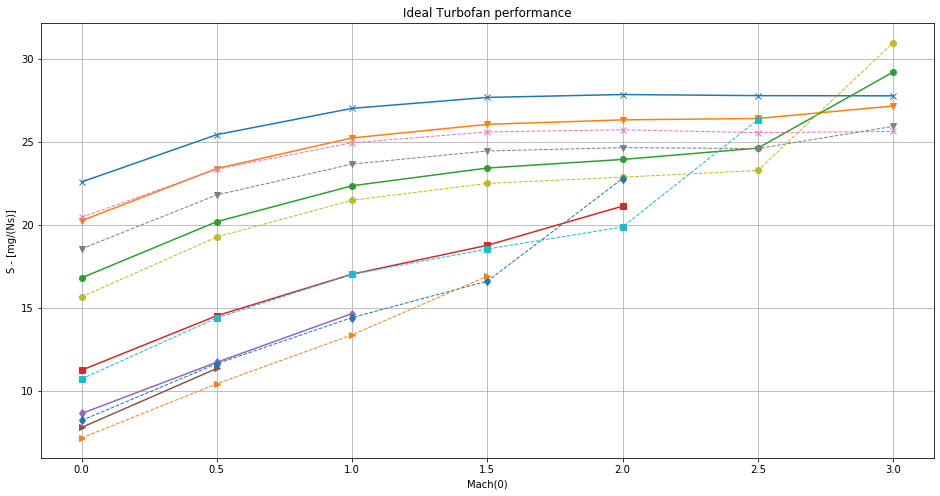

In [ ]:
plt.figure(figsize=(16, 8), facecolor='w')
ax1 = fig.add_subplot(121)
plt.grid(True)
plt.xlabel('Mach(0)')
plt.ylabel('S - [mg/(Ns)]')
plt.title('Ideal Turbofan performance')
ax1.scatter(matrix_M,tsfc[0],s=15)
plt.plot(matrix_M, tsfc[0], marker='x')
ax1.scatter(matrix_M,tsfc[1],s=15)
plt.plot(matrix_M, tsfc[1], marker='v')
ax1.scatter(matrix_M,tsfc[2],s=15)
plt.plot(matrix_M, tsfc[2], marker='o')
ax1.scatter(matrix_M,tsfc[3],s=15)
plt.plot(matrix_M, tsfc[3], marker='s')
ax1.scatter(matrix_M,tsfc[4],s=15)
plt.plot(matrix_M, tsfc[4], marker='d')
ax1.scatter(matrix_M,tsfc[5],s=15)
plt.plot(matrix_M, tsfc[5], marker='>')

ax1.scatter(matrix_M,tsfc[0],s=15)
plt.plot(matrix_M,tsfc_validator[0], marker='x', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,tsfc[1],s=15)
plt.plot(matrix_M,tsfc_validator[1], marker='v', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,tsfc[2],s=15)
plt.plot(matrix_M,tsfc_validator[2], marker='o', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,tsfc[3],s=15)
plt.plot(matrix_M,tsfc_validator[3], marker='s', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,tsfc[4],s=15)
plt.plot(matrix_M,tsfc_validator[4], marker='d', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,tsfc[5],s=15)
plt.plot(matrix_M,tsfc_validator[5], marker='>', linestyle='--', linewidth=1)

ax1.set_aspect(1./ax1.get_data_ratio())
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


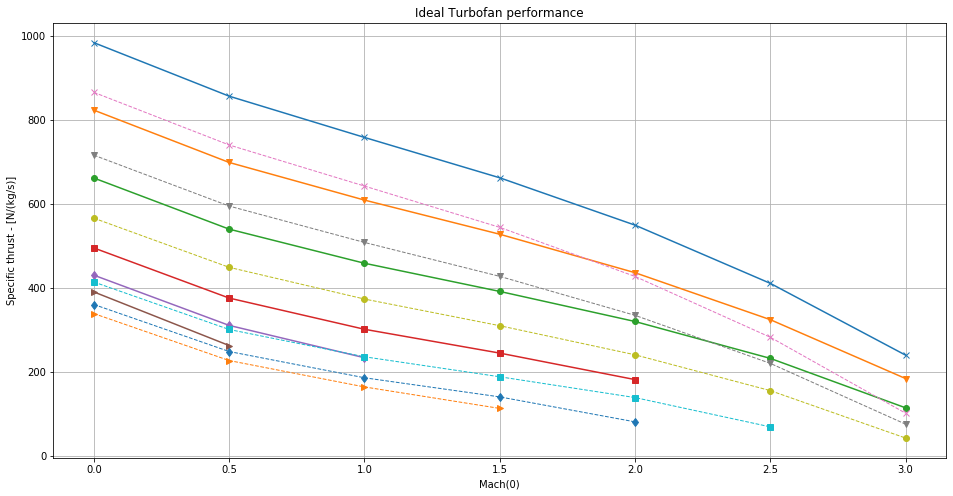

In [ ]:
plt.figure(figsize=(16, 8), facecolor='w')
ax2 = fig.add_subplot(121)
plt.grid(True)
plt.xlabel('Mach(0)')
plt.ylabel('Specific thrust - [N/(kg/s)]')
plt.title('Ideal Turbofan performance')
ax2.scatter(matrix_M,specific_thrust[0],s=15)
plt.plot(matrix_M, specific_thrust[0], marker='x')
ax2.scatter(matrix_M,specific_thrust[1],s=15)
plt.plot(matrix_M, specific_thrust[1], marker='v')
ax2.scatter(matrix_M,specific_thrust[2],s=15)
plt.plot(matrix_M, specific_thrust[2], marker='o')
ax2.scatter(matrix_M,specific_thrust[3],s=15)
plt.plot(matrix_M, specific_thrust[3], marker='s')
ax2.scatter(matrix_M,specific_thrust[4],s=15)
plt.plot(matrix_M, specific_thrust[4], marker='d')
ax2.scatter(matrix_M,specific_thrust[5],s=15)
plt.plot(matrix_M, specific_thrust[5], marker='>')

ax1.scatter(matrix_M,specific_thrust[0],s=15)
plt.plot(matrix_M,specific_thrust_validator[0], marker='x', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,specific_thrust[1],s=15)
plt.plot(matrix_M,specific_thrust_validator[1], marker='v', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,specific_thrust[2],s=15)
plt.plot(matrix_M,specific_thrust_validator[2], marker='o', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,specific_thrust[3],s=15)
plt.plot(matrix_M,specific_thrust_validator[3], marker='s', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,specific_thrust[4],s=15)
plt.plot(matrix_M,specific_thrust_validator[4], marker='d', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,specific_thrust[5],s=15)
plt.plot(matrix_M,specific_thrust_validator[5], marker='>', linestyle='--', linewidth=1)

ax2.set_aspect(1./ax2.get_data_ratio())
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


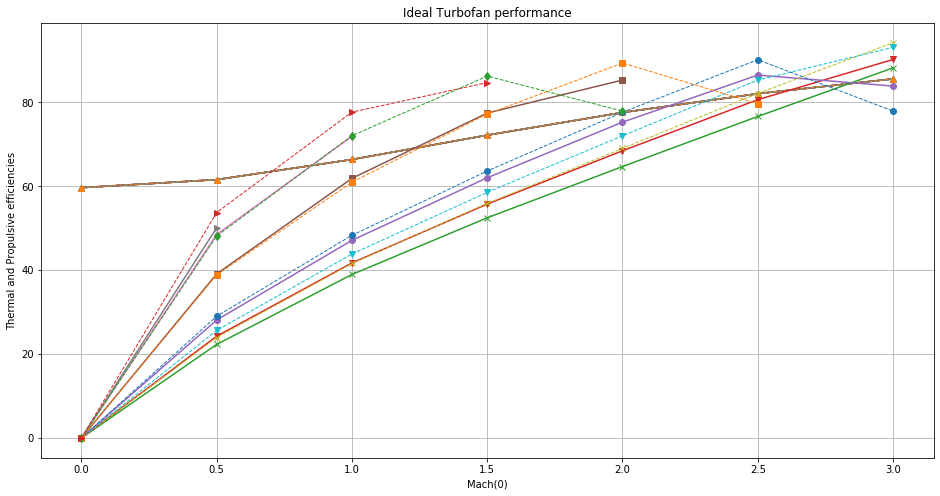

In [ ]:
plt.figure(figsize=(16, 8), facecolor='w')
ax3 = fig.add_subplot(121)
plt.grid(True)
plt.xlabel('Mach(0)')
plt.ylabel('Thermal and Propulsive efficiencies')
plt.title('Ideal Turbofan performance')
ax3.scatter(matrix_M,thermal_ef[0],s=15)
plt.plot(matrix_M, thermal_ef[0])
ax3.scatter(matrix_M,thermal_ef[1],s=15)
plt.plot(matrix_M, thermal_ef[1])
ax3.scatter(matrix_M,thermal_ef[2],s=15)
plt.plot(matrix_M, thermal_ef[2])
ax3.scatter(matrix_M,thermal_ef[3],s=15)
plt.plot(matrix_M, thermal_ef[3])
ax3.scatter(matrix_M,thermal_ef[4],s=15)
plt.plot(matrix_M, thermal_ef[4])
ax3.scatter(matrix_M,thermal_ef[5],s=15)
plt.plot(matrix_M, thermal_ef[5])

ax1.scatter(matrix_M,thermal_ef[0],s=15)
plt.plot(matrix_M,thermal_ef_validator[0], marker='^', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,thermal_ef[1],s=15)
plt.plot(matrix_M,thermal_ef_validator[1], marker='^', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,thermal_ef[2],s=15)
plt.plot(matrix_M,thermal_ef_validator[2], marker='^', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,thermal_ef[3],s=15)
plt.plot(matrix_M,thermal_ef_validator[3], marker='^', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,thermal_ef[4],s=15)
plt.plot(matrix_M,thermal_ef_validator[4], marker='^', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,thermal_ef[5],s=15)
plt.plot(matrix_M,thermal_ef_validator[5], marker='^', linestyle='--', linewidth=1)

ax3.scatter(matrix_M,propulsive_ef[0],s=15)
plt.plot(matrix_M, propulsive_ef[0], marker='x')
ax3.scatter(matrix_M,propulsive_ef[1],s=15)
plt.plot(matrix_M, propulsive_ef[1], marker='v')
ax3.scatter(matrix_M,propulsive_ef[2],s=15)
plt.plot(matrix_M, propulsive_ef[2], marker='o')
ax3.scatter(matrix_M,propulsive_ef[3],s=15)
plt.plot(matrix_M, propulsive_ef[3], marker='s')
ax3.scatter(matrix_M,propulsive_ef[4],s=15)
plt.plot(matrix_M, propulsive_ef[4], marker='d')
ax3.scatter(matrix_M,propulsive_ef[5],s=15)
plt.plot(matrix_M, propulsive_ef[5], marker='>')

ax1.scatter(matrix_M,propulsive_ef[0],s=15)
plt.plot(matrix_M,propulsive_ef_validator[0], marker='x', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,propulsive_ef[1],s=15)
plt.plot(matrix_M,propulsive_ef_validator[1], marker='v', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,propulsive_ef[2],s=15)
plt.plot(matrix_M,propulsive_ef_validator[2], marker='o', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,propulsive_ef[3],s=15)
plt.plot(matrix_M,propulsive_ef_validator[3], marker='s', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,propulsive_ef[4],s=15)
plt.plot(matrix_M,propulsive_ef_validator[4], marker='d', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,propulsive_ef[5],s=15)
plt.plot(matrix_M,propulsive_ef_validator[5], marker='>', linestyle='--', linewidth=1)

ax3.set_aspect(1./ax3.get_data_ratio())
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


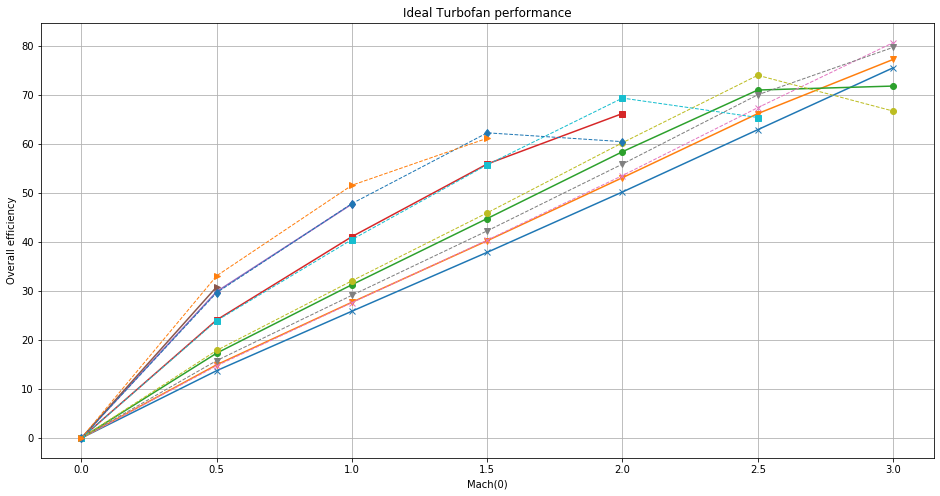

In [ ]:
plt.figure(figsize=(16, 8), facecolor='w')
ax4 = fig.add_subplot(121)
plt.grid(True)
plt.xlabel('Mach(0)')
plt.ylabel('Overall efficiency')
plt.title('Ideal Turbofan performance')
ax4.scatter(matrix_M,overall_ef[0],s=15)
plt.plot(matrix_M, overall_ef[0], marker='x')
ax4.scatter(matrix_M,overall_ef[1],s=15)
plt.plot(matrix_M, overall_ef[1], marker='v')
ax4.scatter(matrix_M,overall_ef[2],s=15)
plt.plot(matrix_M, overall_ef[2], marker='o')
ax4.scatter(matrix_M,overall_ef[3],s=15)
plt.plot(matrix_M, overall_ef[3], marker='s')
ax4.scatter(matrix_M,overall_ef[4],s=15)
plt.plot(matrix_M, overall_ef[4], marker='d')
ax4.scatter(matrix_M,overall_ef[5],s=15)
plt.plot(matrix_M, overall_ef[5], marker='>')

ax1.scatter(matrix_M,overall_ef[0],s=15)
plt.plot(matrix_M,overall_ef_validator[0], marker='x', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,overall_ef[1],s=15)
plt.plot(matrix_M,overall_ef_validator[1], marker='v', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,overall_ef[2],s=15)
plt.plot(matrix_M,overall_ef_validator[2], marker='o', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,overall_ef[3],s=15)
plt.plot(matrix_M,overall_ef_validator[3], marker='s', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,overall_ef[4],s=15)
plt.plot(matrix_M,overall_ef_validator[4], marker='d', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,overall_ef[5],s=15)
plt.plot(matrix_M,overall_ef_validator[5], marker='>', linestyle='--', linewidth=1)

ax4.set_aspect(1./ax4.get_data_ratio())
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


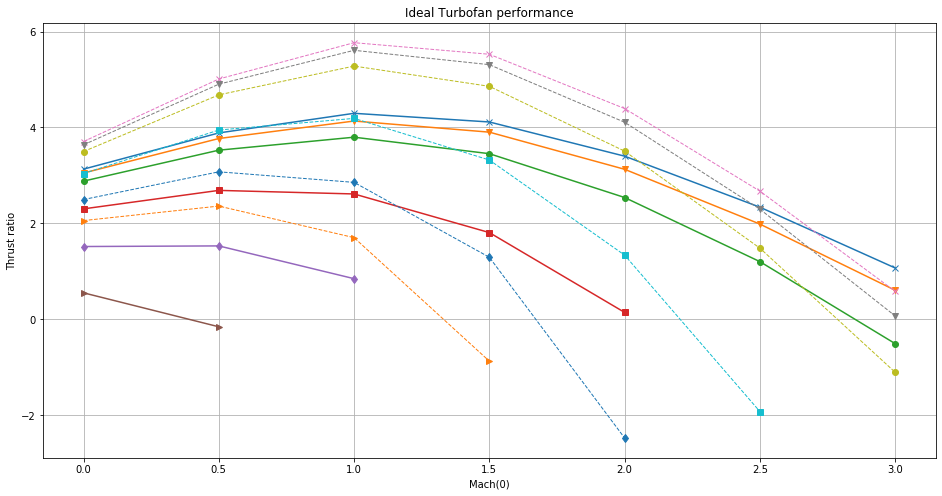

In [ ]:
plt.figure(figsize=(16, 8), facecolor='w')
ax5 = fig.add_subplot(121)
plt.grid(True)
plt.xlabel('Mach(0)')
plt.ylabel('Thrust ratio')
plt.title('Ideal Turbofan performance')
ax5.scatter(matrix_M,thrust_ratio[0],s=15)
plt.plot(matrix_M, thrust_ratio[0], marker='x')
ax5.scatter(matrix_M,thrust_ratio[1],s=15)
plt.plot(matrix_M, thrust_ratio[1], marker='v')
ax5.scatter(matrix_M,thrust_ratio[2],s=15)
plt.plot(matrix_M, thrust_ratio[2], marker='o')
ax5.scatter(matrix_M,thrust_ratio[3],s=15)
plt.plot(matrix_M, thrust_ratio[3], marker='s')
ax5.scatter(matrix_M,thrust_ratio[4],s=15)
plt.plot(matrix_M, thrust_ratio[4], marker='d')
ax5.scatter(matrix_M,thrust_ratio[5],s=15)
plt.plot(matrix_M, thrust_ratio[5], marker='>')

ax1.scatter(matrix_M,thrust_ratio[0],s=15)
plt.plot(matrix_M,thrust_ratio_validator[0], marker='x', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,thrust_ratio[1],s=15)
plt.plot(matrix_M,thrust_ratio_validator[1], marker='v', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,thrust_ratio[2],s=15)
plt.plot(matrix_M,thrust_ratio_validator[2], marker='o', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,thrust_ratio[3],s=15)
plt.plot(matrix_M,thrust_ratio_validator[3], marker='s', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,thrust_ratio[4],s=15)
plt.plot(matrix_M,thrust_ratio_validator[4], marker='d', linestyle='--', linewidth=1)
ax1.scatter(matrix_M,thrust_ratio[5],s=15)
plt.plot(matrix_M,thrust_ratio_validator[5], marker='>', linestyle='--', linewidth=1)

ax5.set_aspect(1./ax5.get_data_ratio())
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[[0.57510938 0.58652366 0.59667613 0.61405424 0.62850143 0.64079519
  0.64630147]
 [0.57510938 0.58652366 0.59667613 0.61405424 0.62850143 0.64079519
  0.64630147]
 [0.57510938 0.58652366 0.59667613 0.61405424 0.62850143 0.64079519
  0.64630147]
 [0.57510938 0.58652366 0.59667613 0.61405424 0.62850143 0.64079519
  0.64630147]
 [0.57510938 0.58652366 0.59667613 0.61405424 0.62850143 0.64079519
  0.64630147]
 [0.57510938 0.58652366 0.59667613 0.61405424 0.62850143 0.64079519
  0.64630147]
 [0.         0.         0.         0.         0.         0.
  0.        ]]


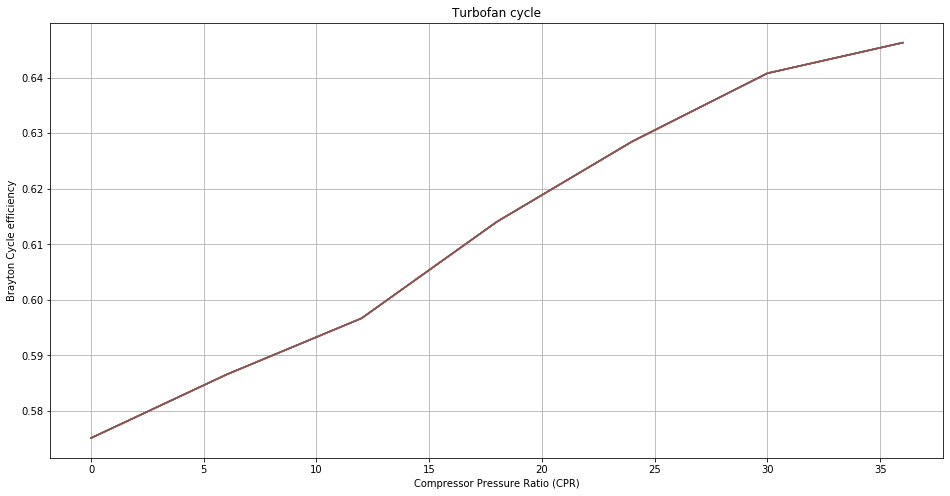

In [ ]:
plt.figure(figsize=(16, 8), facecolor='w')
ax6 = fig.add_subplot(121)
plt.grid(True)
plt.xlabel('Compressor Pressure Ratio (CPR)')
plt.ylabel('Brayton Cycle efficiency')
plt.title('Turbofan cycle')
ax6.scatter(matrix_CPR,cycle_ef[0],s=15)
plt.plot(matrix_CPR, cycle_ef[0])
ax6.scatter(matrix_CPR,cycle_ef[1],s=15)
plt.plot(matrix_CPR, cycle_ef[1])
ax6.scatter(matrix_CPR,cycle_ef[2],s=15)
plt.plot(matrix_CPR, cycle_ef[2])
ax6.scatter(matrix_CPR,cycle_ef[3],s=15)
plt.plot(matrix_CPR, cycle_ef[3])
ax6.scatter(matrix_CPR,cycle_ef[4],s=15)
plt.plot(matrix_CPR, cycle_ef[4])
ax6.scatter(matrix_CPR,cycle_ef[5],s=15)
plt.plot(matrix_CPR, cycle_ef[5])
print(cycle_ef)

ax6.set_aspect(1./ax6.get_data_ratio())
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[[722.48115801 736.82034873 749.57438221 771.40563607 789.55491857
  804.99895837 811.91621836]
 [606.88417273 618.92909294 629.64248106 647.9807343  663.2261316
  676.19912503 682.00962342]
 [491.28718744 501.03783714 509.7105799  524.55583253 536.89734463
  547.39929169 552.10302848]
 [375.69020216 383.14658134 389.77867875 401.13093076 410.56855766
  418.59945835 422.19643355]
 [260.09321688 265.25532554 269.8467776  277.70602898 284.23977068
  289.79962501 292.28983861]
 [ 86.69773896  88.41844185  89.94892587  92.56867633  94.74659023
   96.599875    97.4299462 ]
 [  0.           0.           0.           0.           0.
    0.           0.        ]]


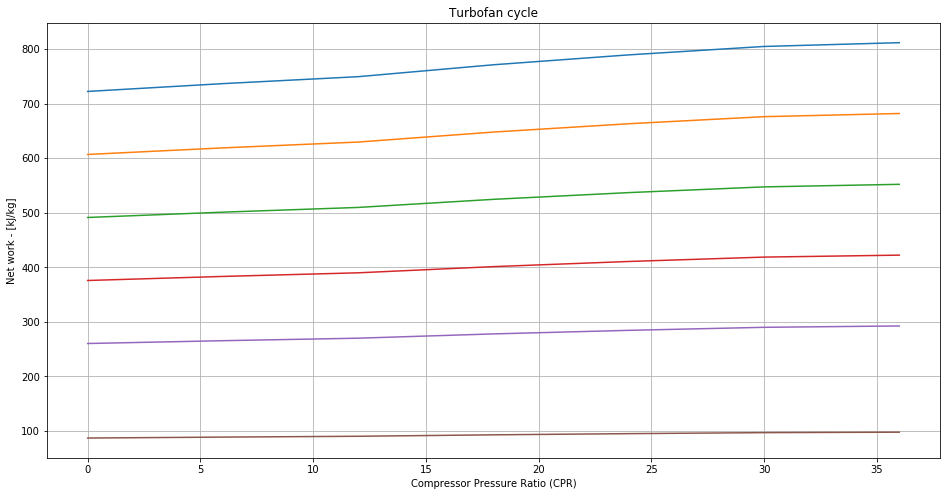

In [ ]:
plt.figure(figsize=(16, 8), facecolor='w')
ax7 = fig.add_subplot(121)
plt.grid(True)
plt.xlabel('Compressor Pressure Ratio (CPR)')
plt.ylabel('Net work - [kJ/kg]')
plt.title('Turbofan cycle')
ax7.scatter(matrix_CPR,net_work[0],s=15)
plt.plot(matrix_CPR, net_work[0])
ax7.scatter(matrix_CPR,net_work[1],s=15)
plt.plot(matrix_CPR, net_work[1])
ax7.scatter(matrix_CPR,net_work[2],s=15)
plt.plot(matrix_CPR, net_work[2])
ax7.scatter(matrix_CPR,net_work[3],s=15)
plt.plot(matrix_CPR, net_work[3])
ax7.scatter(matrix_CPR,net_work[4],s=15)
plt.plot(matrix_CPR, net_work[4])
ax7.scatter(matrix_CPR,net_work[5],s=15)
plt.plot(matrix_CPR, net_work[5])
print(net_work)

ax7.set_aspect(1./ax7.get_data_ratio())
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


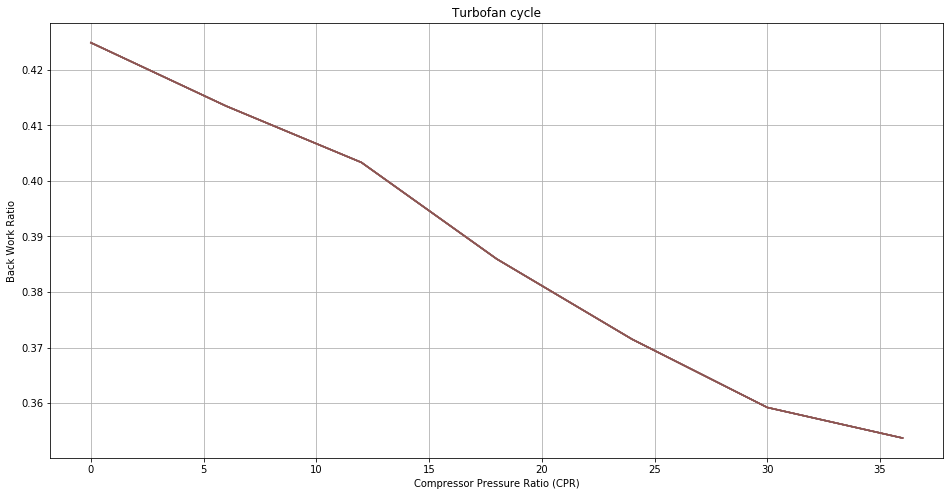

In [ ]:
plt.figure(figsize=(16, 8), facecolor='w')
ax8 = fig.add_subplot(121)
plt.grid(True)
plt.xlabel('Compressor Pressure Ratio (CPR)')
plt.ylabel('Back Work Ratio')
plt.title('Turbofan cycle')
ax8.scatter(matrix_CPR,reverse_work[0],s=15)
plt.plot(matrix_CPR, reverse_work[0])
ax8.scatter(matrix_CPR,reverse_work[1],s=15)
plt.plot(matrix_CPR, reverse_work[1])
ax8.scatter(matrix_CPR,reverse_work[2],s=15)
plt.plot(matrix_CPR, reverse_work[2])
ax8.scatter(matrix_CPR,reverse_work[3],s=15)
plt.plot(matrix_CPR, reverse_work[3])
ax8.scatter(matrix_CPR,reverse_work[4],s=15)
plt.plot(matrix_CPR, reverse_work[4])
ax8.scatter(matrix_CPR,reverse_work[5],s=15)
plt.plot(matrix_CPR, reverse_work[5])

ax8.set_aspect(1./ax8.get_data_ratio())
plt.show()